In [1]:
# Loading important Libraries.....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading libraries from SK-Learn.......
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Loading Ensemble Libraries...
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Loading Model selection libraries.....
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.....
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Warnings....
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Reading th csv file......
df=pd.read_csv('Baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


## Understanding Dataset:

1) Features/Attributes(15):                                                                                                 
   >> Runs(R), At Bats(AB), Hits(H), Doubles(2B), Triples(3B), Homeruns(HR), Walks(BB), Strikeouts(SO), Stolen Bases(SB),             Runs Allowed(RA), Earned Runs(ER), Earned Run Average (ERA), Shutouts(SHO), Saves(SV), and Errors(E).                    

2) Target/Label:                                           
   >> Number of predicted wins (W).                              

3) General Approach:                                      
   >> As I can see the Target is continuous data thus for predicting the number of times the baseball team will win i will use        linear regression approach for this problem.                     

# EDA ( Exploratory Data  Analysis):

In [3]:
# Checking the shape of Dataset.
# shape(rows,columns) =>>> It means 30 rows and 17 columns.
df.shape

(30, 17)

In [4]:
# Printed the first 10 rows of the dataset to check whether the data is loaded succesfully in the dataframe.
df.head(10) 

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
# Printed the last 10 rows of the dataset...........
df.tail(30)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [6]:
# Statistical Features Information
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [7]:
# checking the Features information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
# Checking the unique values
for col in df.columns.values:
    print("Number of unique values of {} : {} ".format(col,df[col].nunique()))

Number of unique values of W : 24 
Number of unique values of R : 28 
Number of unique values of AB : 29 
Number of unique values of H : 29 
Number of unique values of 2B : 22 
Number of unique values of 3B : 23 
Number of unique values of HR : 27 
Number of unique values of BB : 29 
Number of unique values of SO : 29 
Number of unique values of SB : 27 
Number of unique values of RA : 30 
Number of unique values of ER : 30 
Number of unique values of ERA : 30 
Number of unique values of CG : 9 
Number of unique values of SHO : 12 
Number of unique values of SV : 20 
Number of unique values of E : 21 


In [9]:
# checking the Data types.
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

# Univariate Plot Analysis

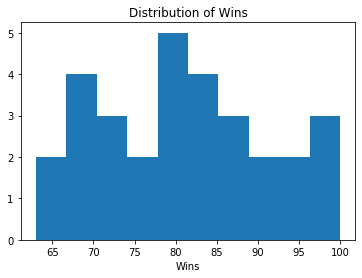

In [10]:
# Plotting distribution of wins
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')
plt.show()

W         AxesSubplot(0.125,0.772143;0.168478x0.107857)
R      AxesSubplot(0.327174,0.772143;0.168478x0.107857)
AB     AxesSubplot(0.529348,0.772143;0.168478x0.107857)
H      AxesSubplot(0.731522,0.772143;0.168478x0.107857)
2B        AxesSubplot(0.125,0.642714;0.168478x0.107857)
3B     AxesSubplot(0.327174,0.642714;0.168478x0.107857)
HR     AxesSubplot(0.529348,0.642714;0.168478x0.107857)
BB     AxesSubplot(0.731522,0.642714;0.168478x0.107857)
SO        AxesSubplot(0.125,0.513286;0.168478x0.107857)
SB     AxesSubplot(0.327174,0.513286;0.168478x0.107857)
RA     AxesSubplot(0.529348,0.513286;0.168478x0.107857)
ER     AxesSubplot(0.731522,0.513286;0.168478x0.107857)
ERA       AxesSubplot(0.125,0.383857;0.168478x0.107857)
CG     AxesSubplot(0.327174,0.383857;0.168478x0.107857)
SHO    AxesSubplot(0.529348,0.383857;0.168478x0.107857)
SV     AxesSubplot(0.731522,0.383857;0.168478x0.107857)
E         AxesSubplot(0.125,0.254429;0.168478x0.107857)
dtype: object

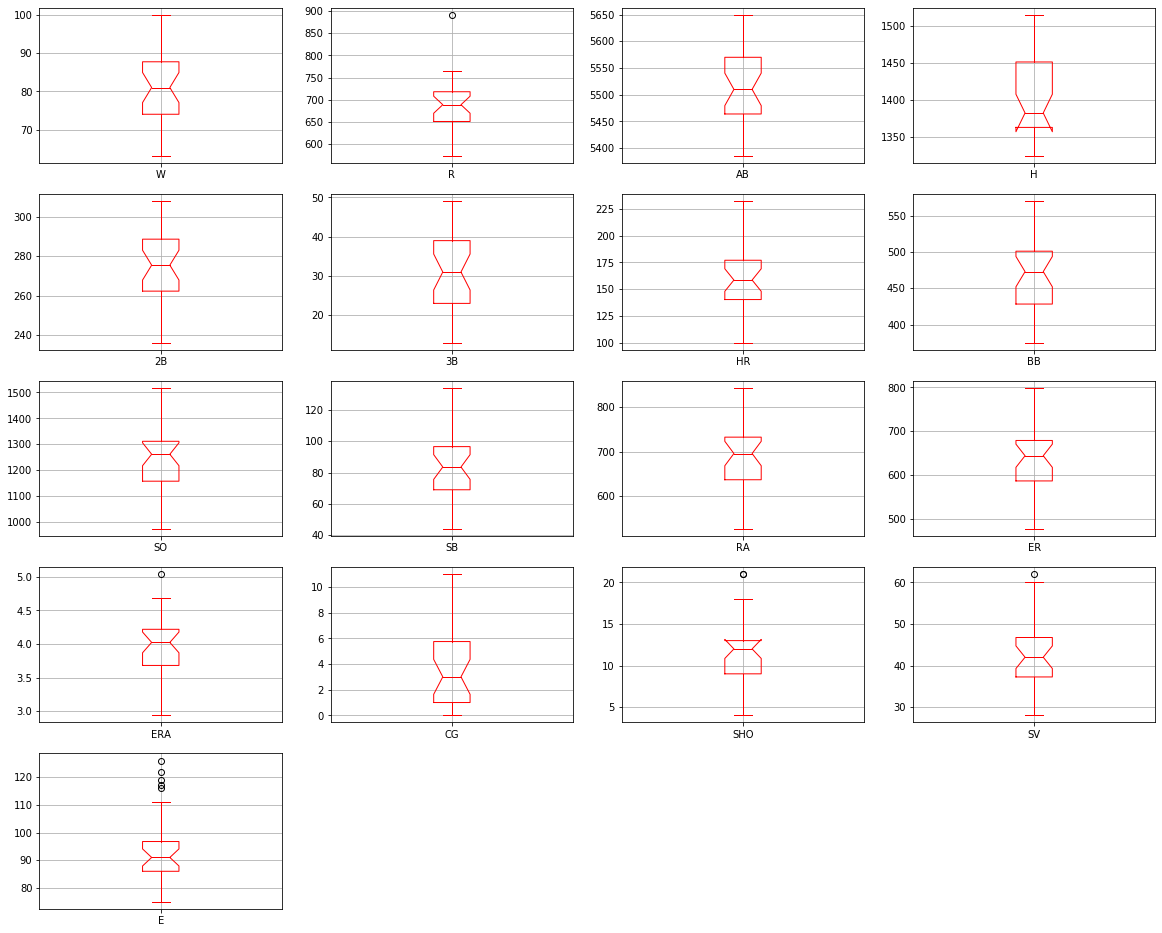

In [11]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(6,4),figsize=(20,20),grid=True,notch=True,color='red' ,legend=True)

##### Conclusion from boxplot: Outliers are present more in E

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002485C47F748>,
      dtype=object)

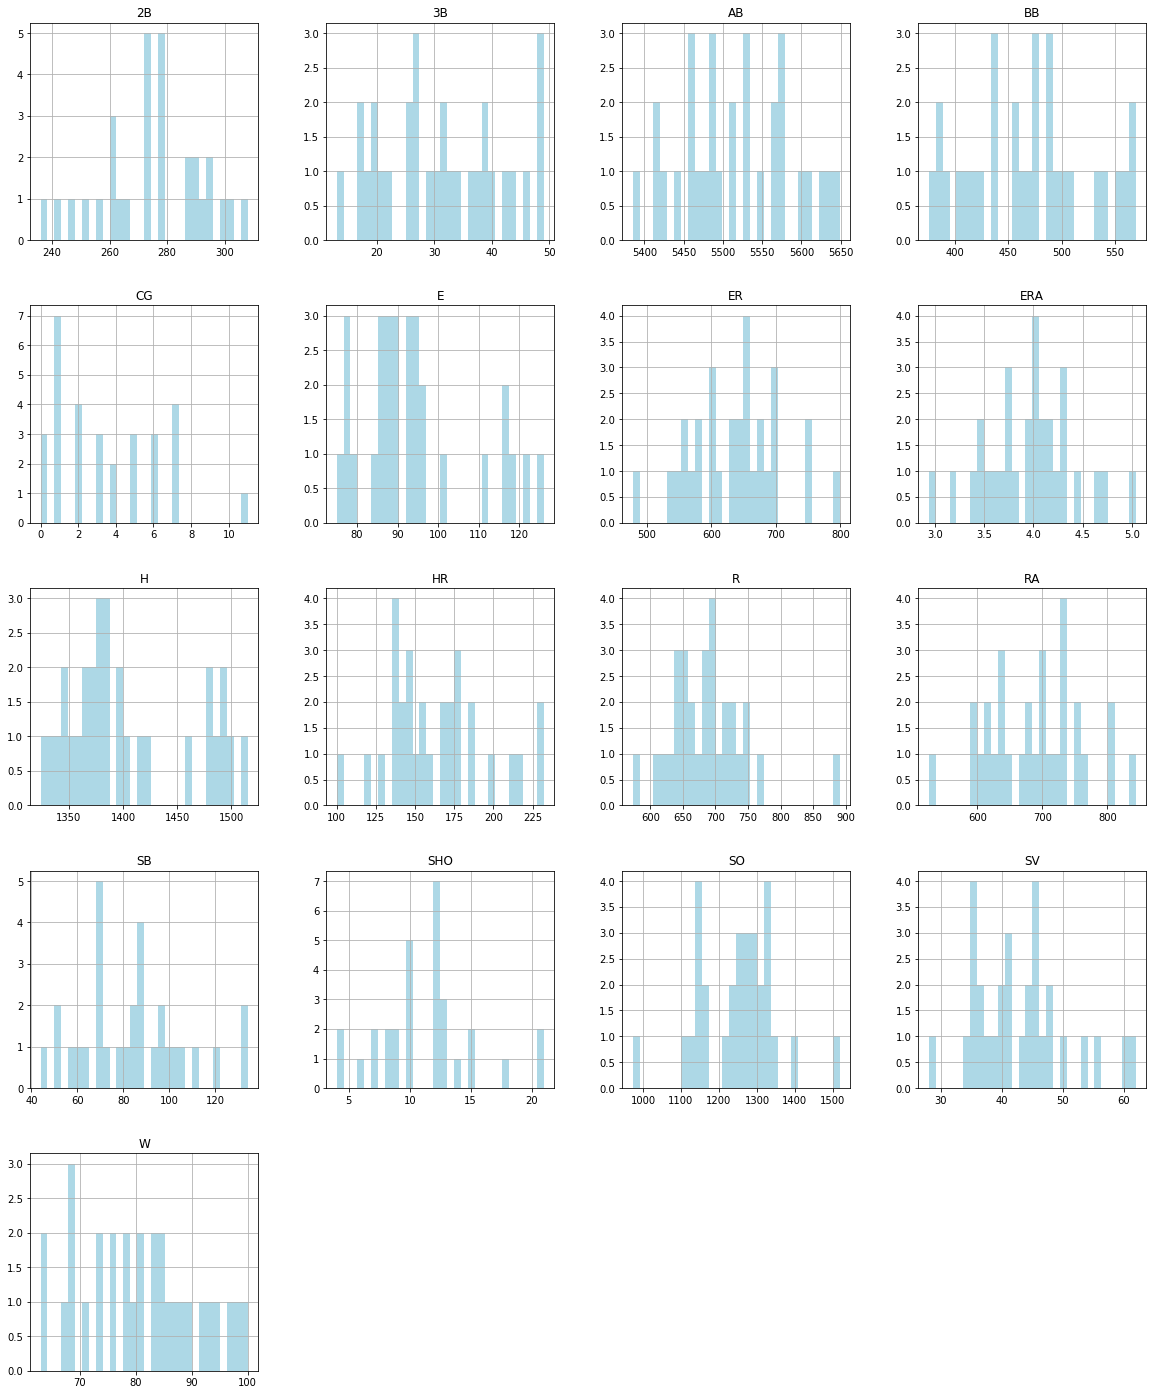

In [12]:
#Checking the Distribution using the histogram plot.
df.hist(figsize=(20,30),grid=True,layout=(6,4),bins=30,color='lightblue')

## Bivariate plots analysis

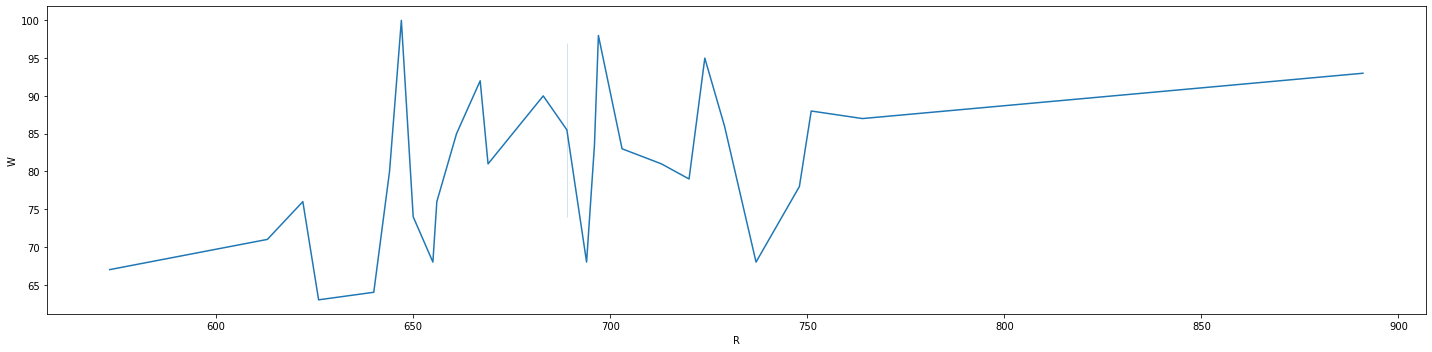

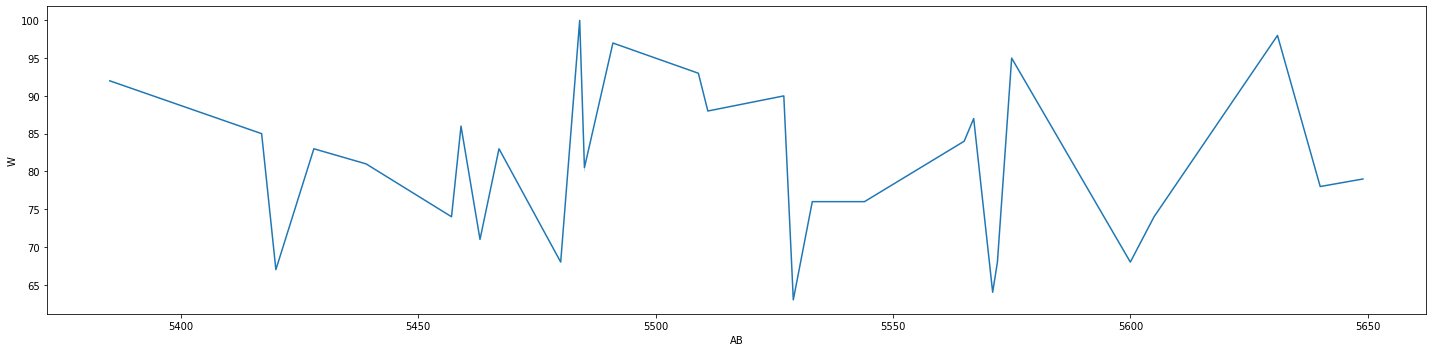

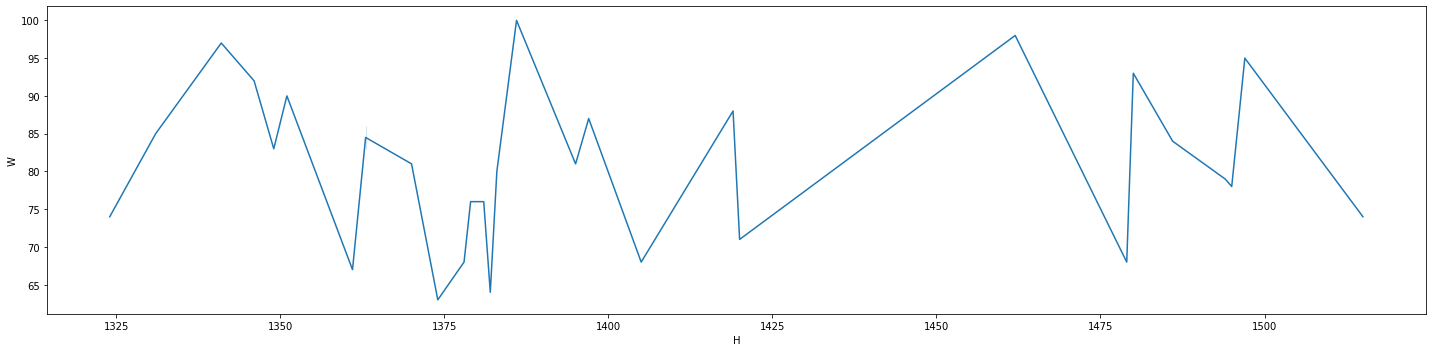

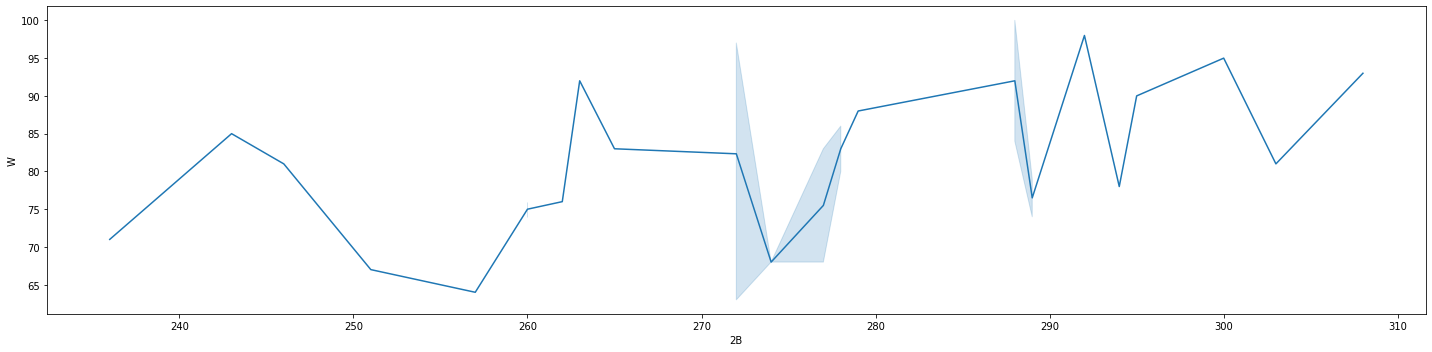

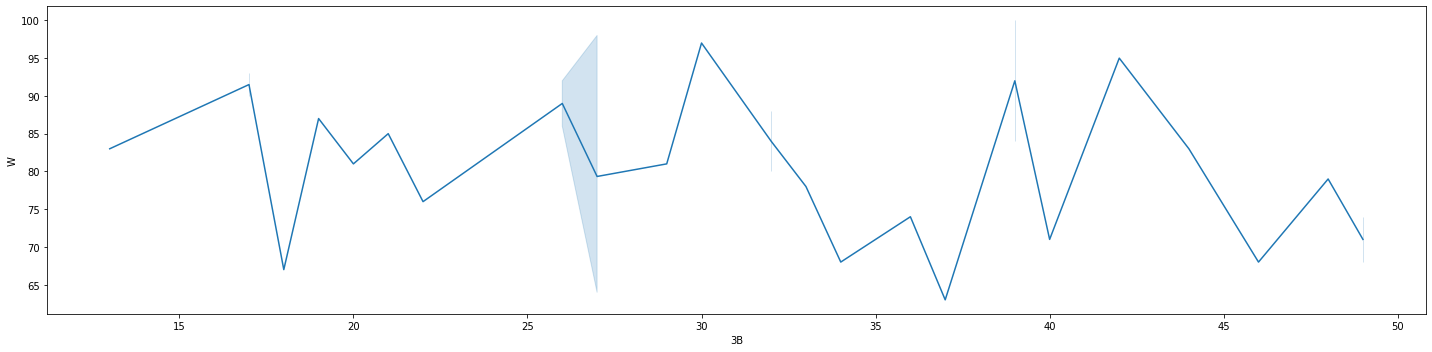

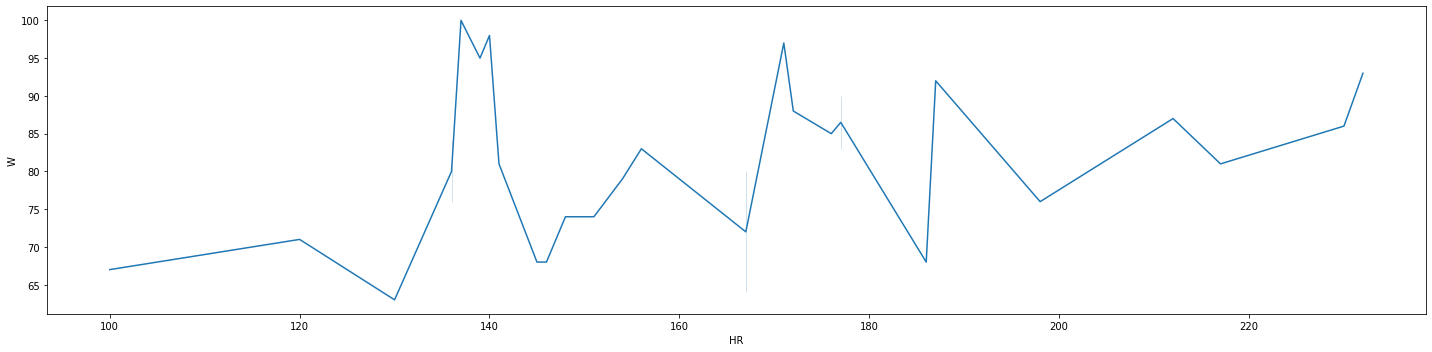

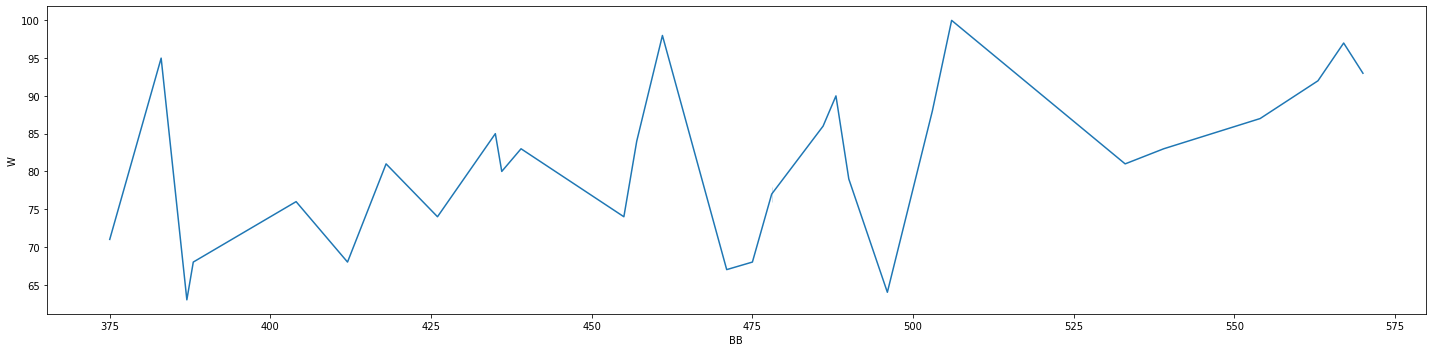

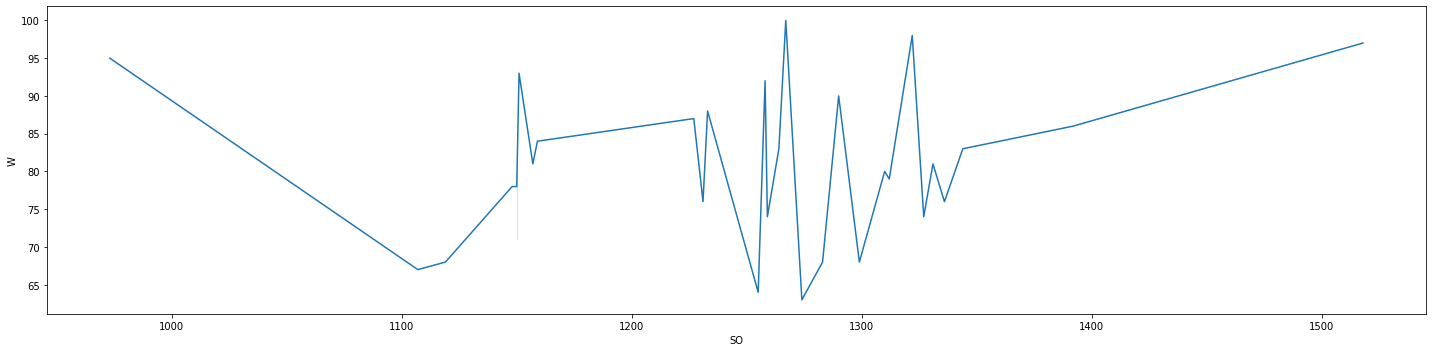

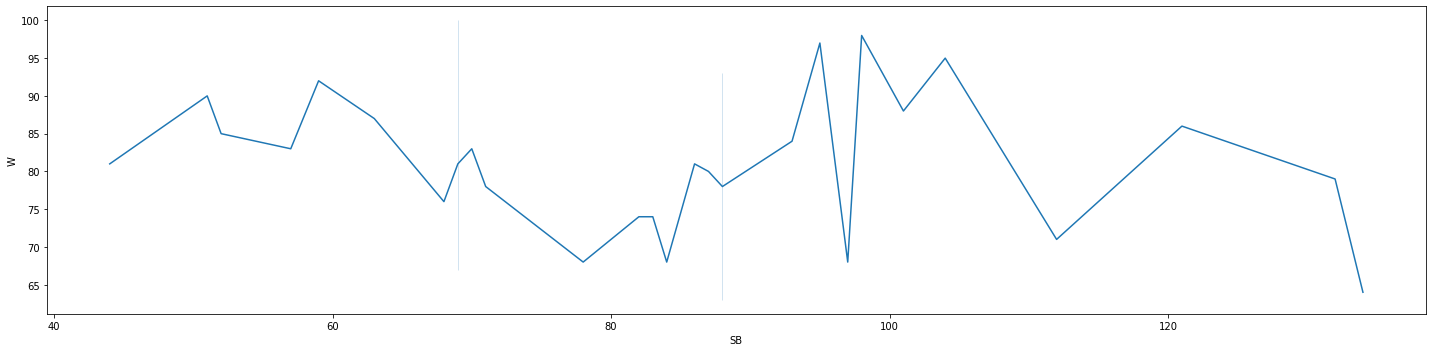

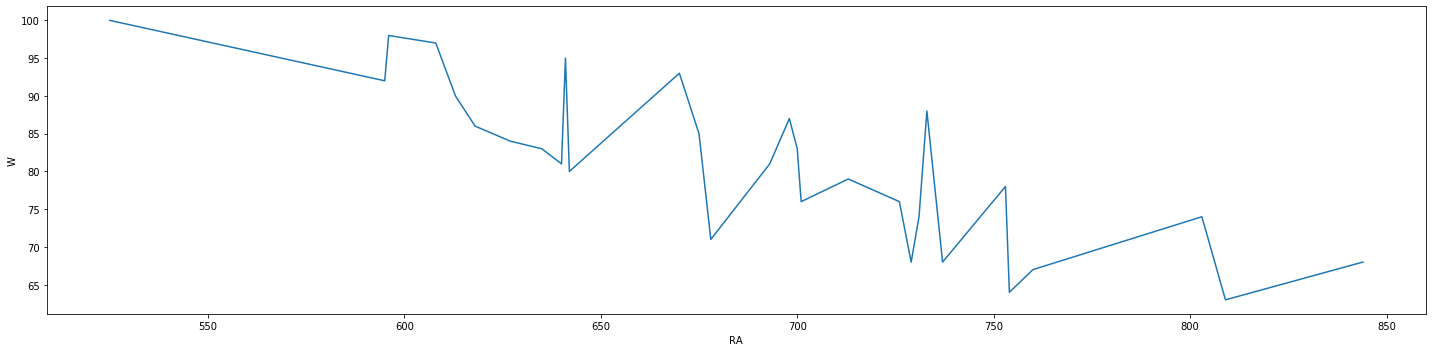

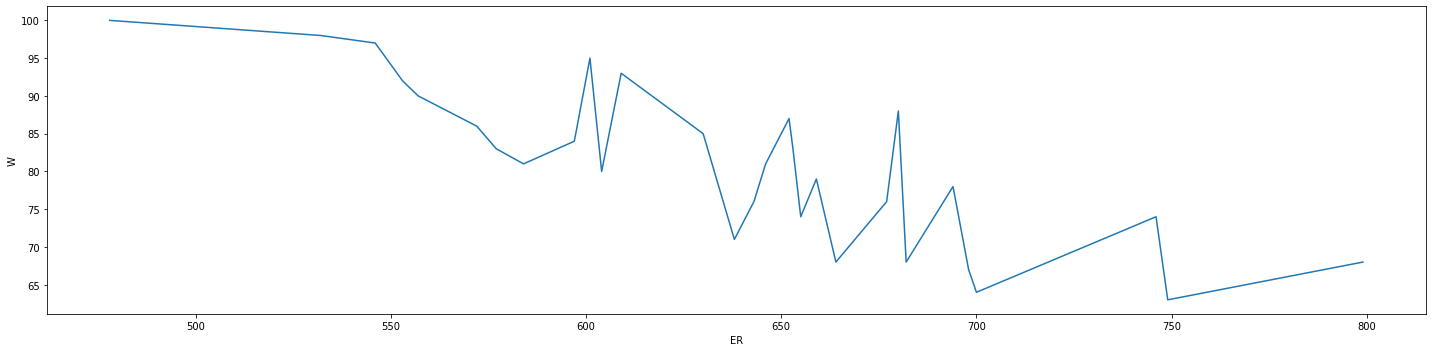

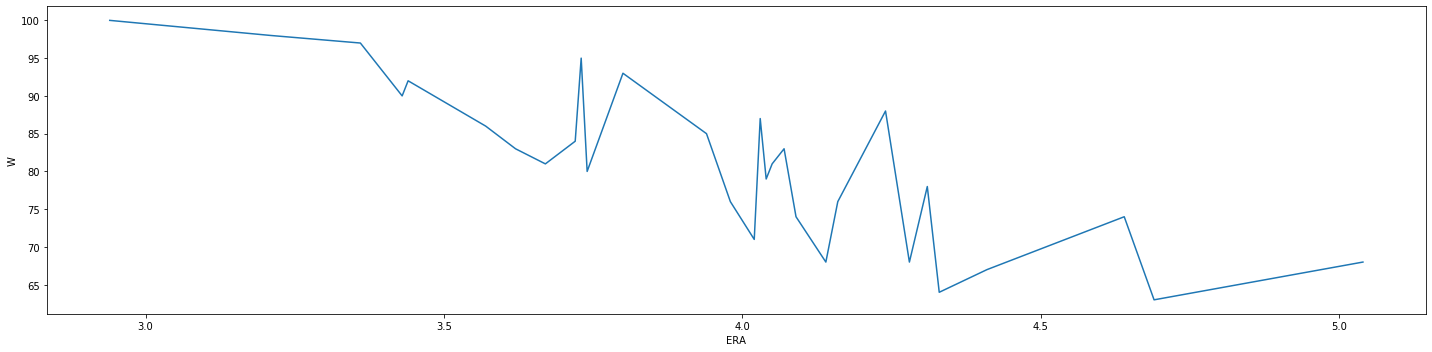

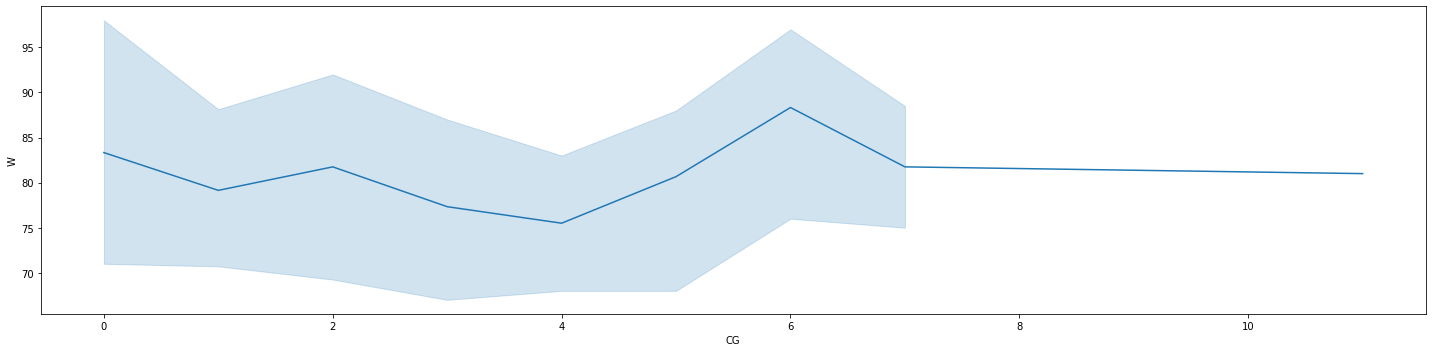

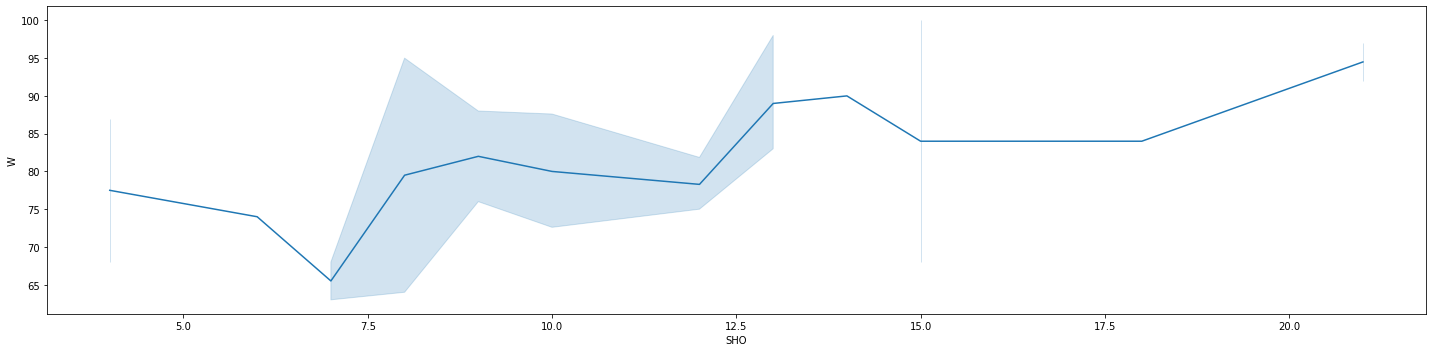

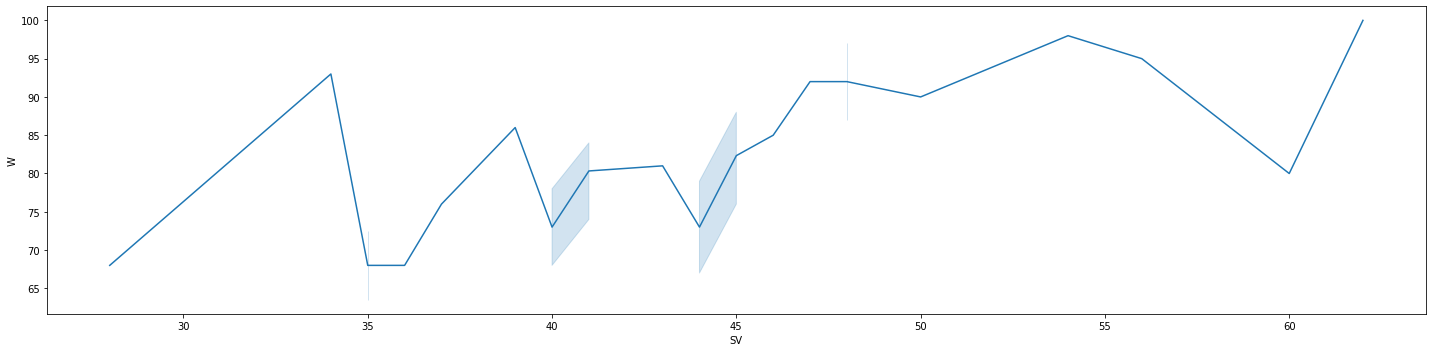

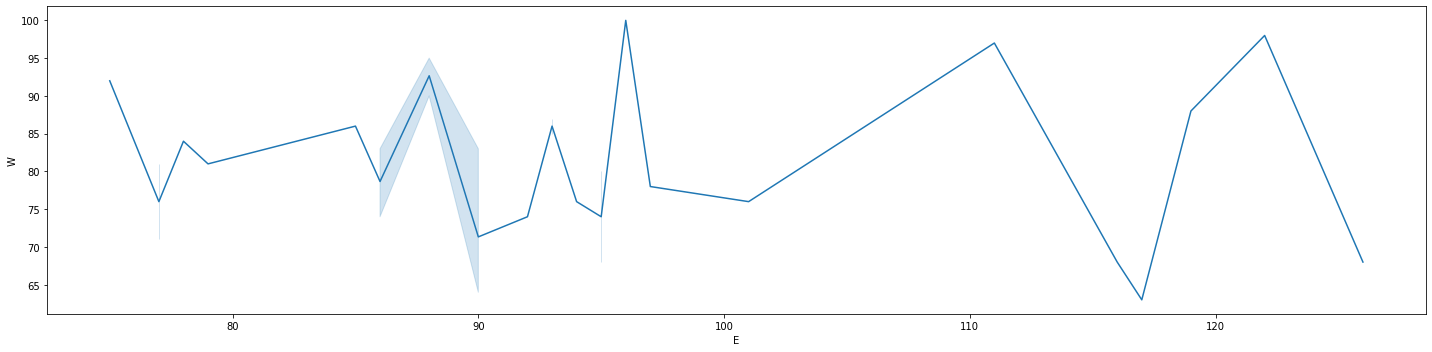

In [13]:
for i in df.drop(['W'],axis=1).columns.values:
    plt.subplots(figsize=(20,5))
    sns.lineplot(x=i,y='W',data=df,)
    plt.tight_layout()
#Runs(R), At Bats(AB), Hits(H), Doubles(2B), Triples(3B), Homeruns(HR), Walks(BB), Strikeouts(SO), 
#Stolen Bases(SB), Runs Allowed(RA), Earned Runs(ER), Earned Run Average (ERA), Shutouts(SHO), Saves(SV), and Errors(E). 

#### After studying the lineplot i infer the following details:                            

>> 1) If the Runs(R) made more than 750 then the chances of winning increases.   
>> 2) More the doubles more the chance to win.            
>> 3) More Homeruns a team have chances of winning is more.             
>> 4) More strikeouts leads to winning side.               
>> 5) If Runs Allowed are increses then chances of winning reduces.            
>> 6) Earned runs and Earned run average are both inversely proportional to winning.             
>> 7) Increase in number of Shutouts leads to winning.              
>> 8) More saves means more winning chances.          

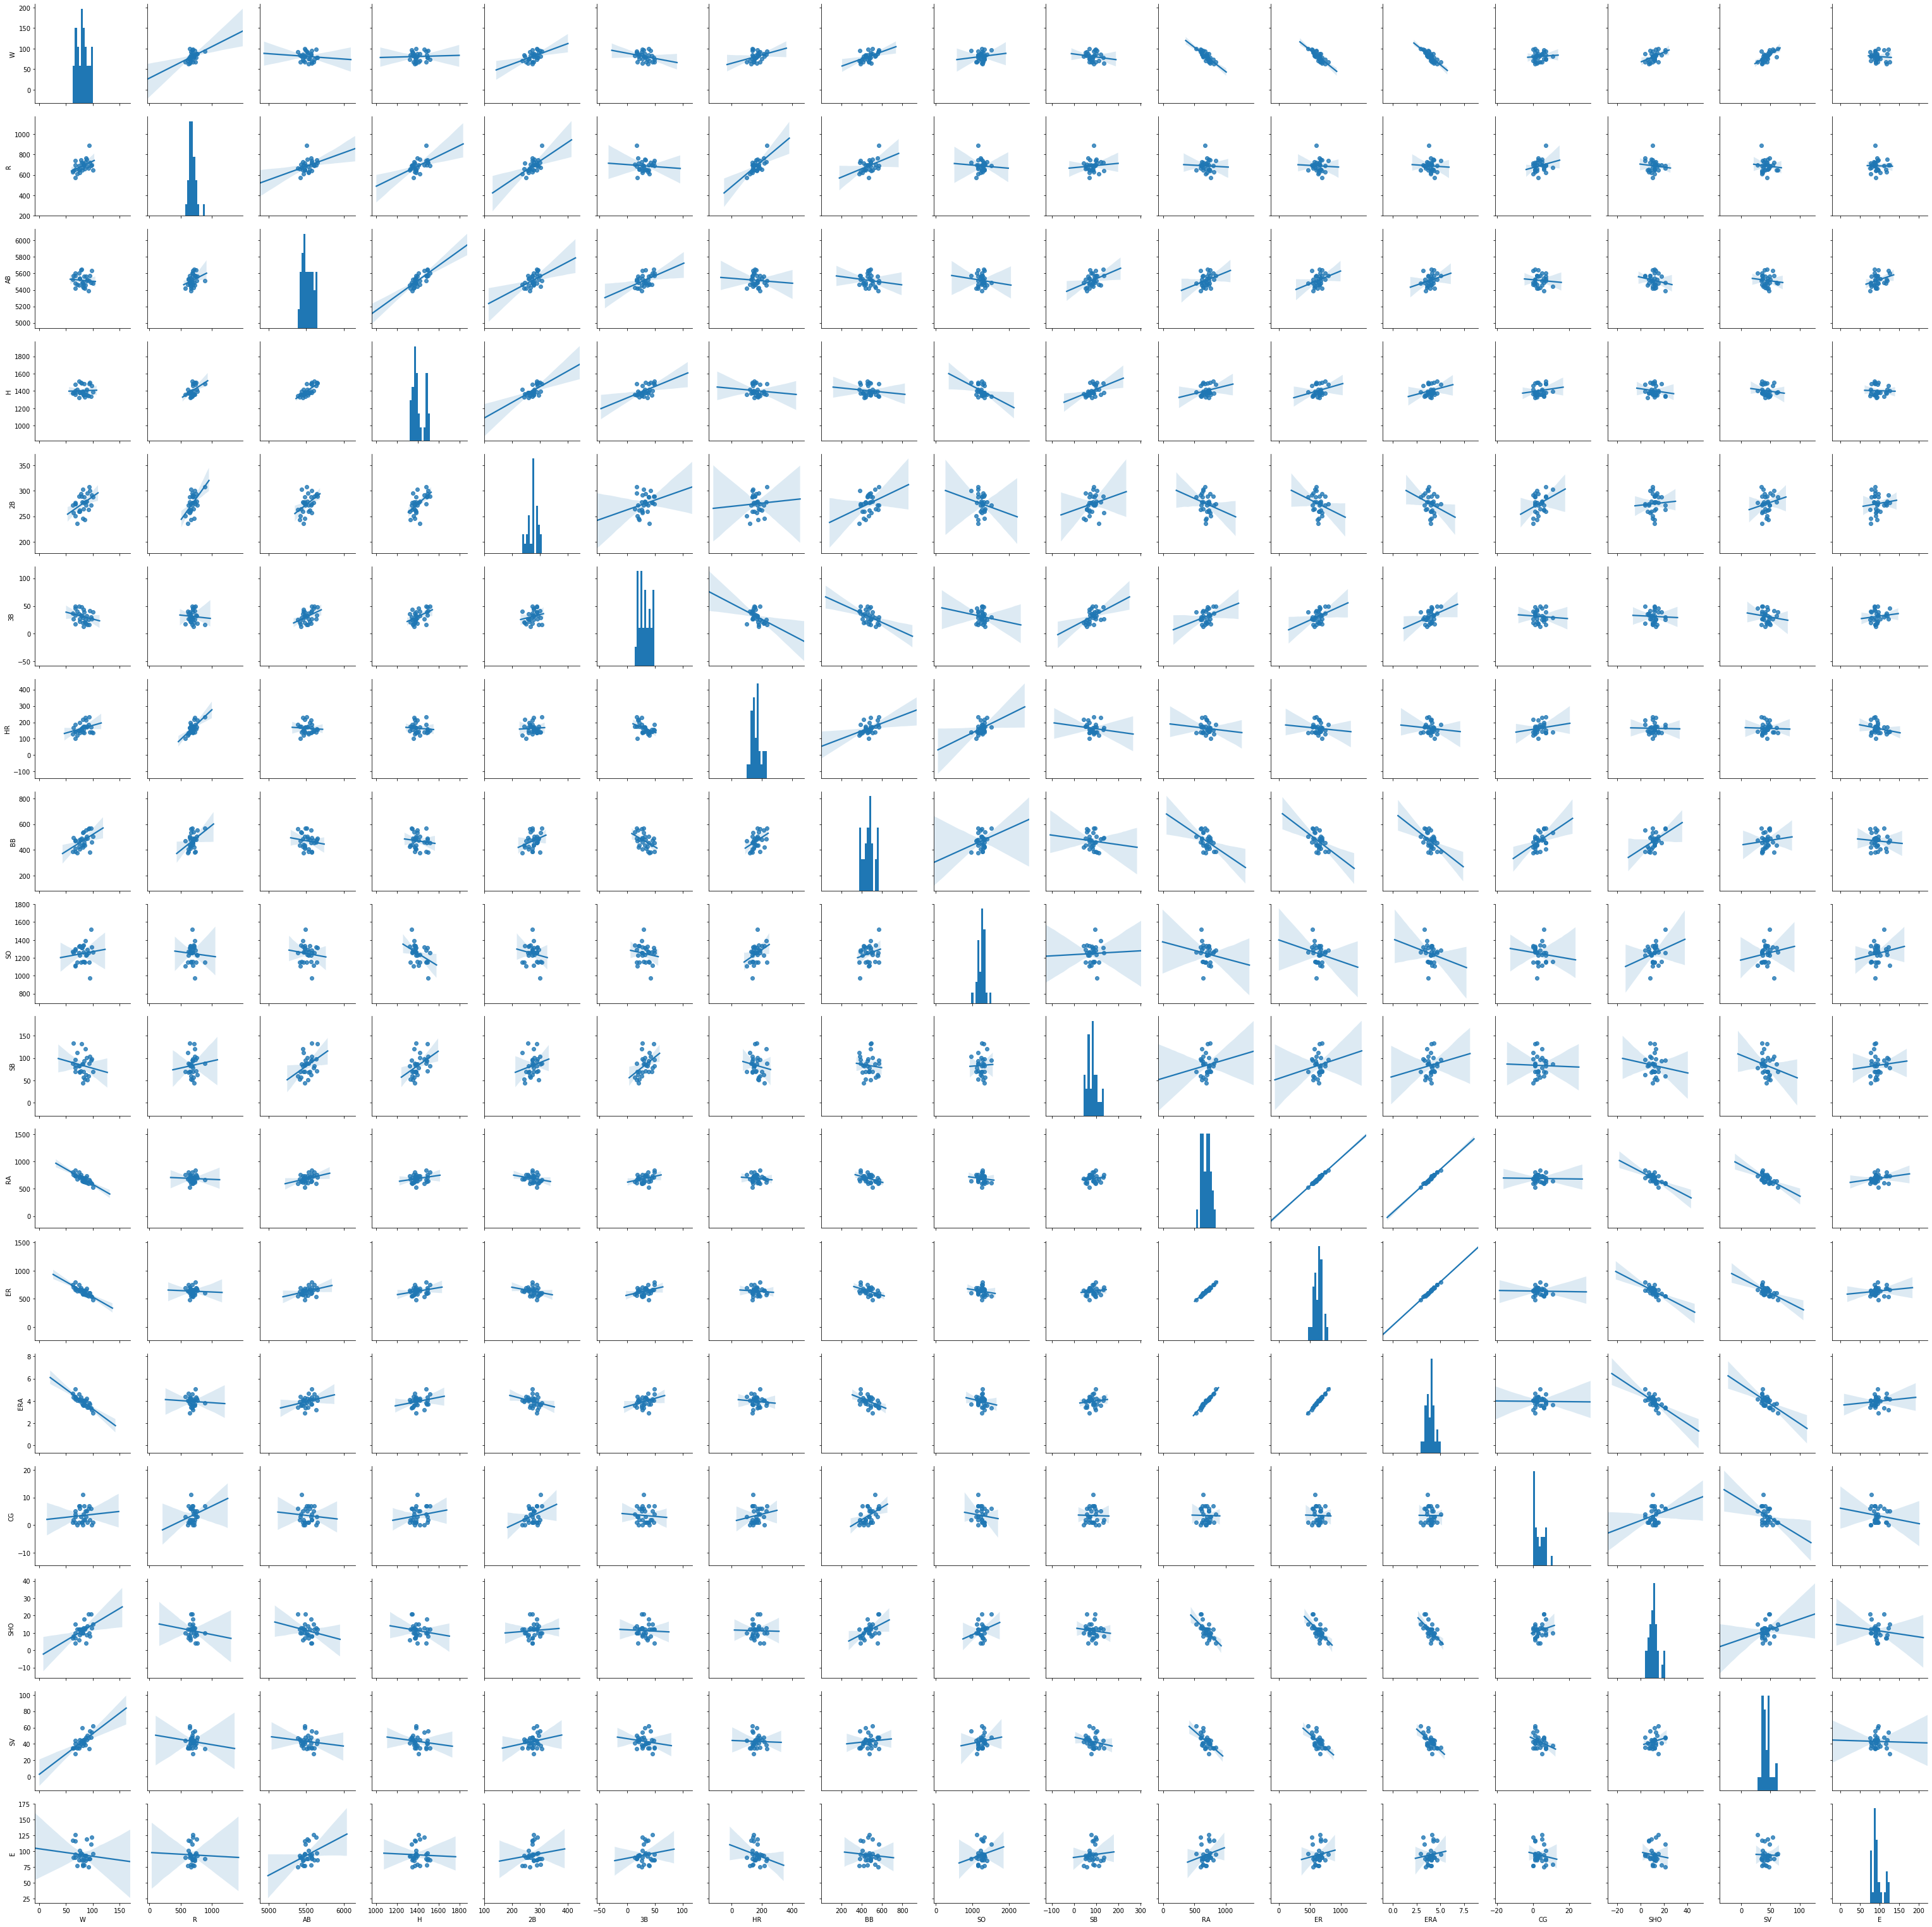

In [14]:
# Plotting the pairplot to analyze correlation between fields
sns.pairplot(df,kind='reg')

In [15]:
# Checking the correlation
df.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)
# children are having very weak correlation with the target value.

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1,0.43,-0.088,0.038,0.43,-0.25,0.31,0.48,0.11,-0.16,-0.81,-0.81,-0.82,0.081,0.47,0.67,-0.089
R,0.43,1,0.32,0.48,0.56,-0.07,0.67,0.4,-0.055,0.081,-0.042,-0.041,-0.049,0.23,-0.1,-0.096,-0.023
AB,-0.088,0.32,1,0.74,0.45,0.44,-0.067,-0.14,-0.11,0.37,0.32,0.31,0.26,-0.081,-0.2,-0.11,0.32
H,0.038,0.48,0.74,1,0.57,0.48,-0.091,-0.12,-0.4,0.41,0.22,0.25,0.23,0.15,-0.15,-0.13,-0.033
2B,0.43,0.56,0.45,0.57,1,0.22,0.056,0.3,-0.15,0.2,-0.22,-0.24,-0.25,0.31,0.058,0.17,0.11
3B,-0.25,-0.07,0.44,0.48,0.22,1,-0.43,-0.45,-0.14,0.46,0.31,0.34,0.33,-0.066,-0.041,-0.14,0.13
HR,0.31,0.67,-0.067,-0.091,0.056,-0.43,1,0.43,0.36,-0.14,-0.1,-0.086,-0.091,0.16,-0.019,-0.029,-0.21
BB,0.48,0.4,-0.14,-0.12,0.3,-0.45,0.43,1,0.23,-0.098,-0.42,-0.45,-0.46,0.46,0.43,0.099,-0.076
SO,0.11,-0.055,-0.11,-0.4,-0.15,-0.14,0.36,0.23,1,0.031,-0.13,-0.16,-0.18,-0.093,0.24,0.13,0.16
SB,-0.16,0.081,0.37,0.41,0.2,0.46,-0.14,-0.098,0.031,1,0.13,0.14,0.13,-0.021,-0.11,-0.18,0.079


Conclusion:               
    1) At Bats(AB),Homeruns(H),CG,Errors(E) all are having very weak correlation with Target.            
    2) RA,Earned Run(ER),Earned Run Average(ERA), have very strong but negative correlation with the target.              
    3) Runs(R),Doubles(2B),Walks(BB),Shutouts(SHO),Saves(SV) have strong and positive correlation with the target. 
    

(17.0, 0.0)

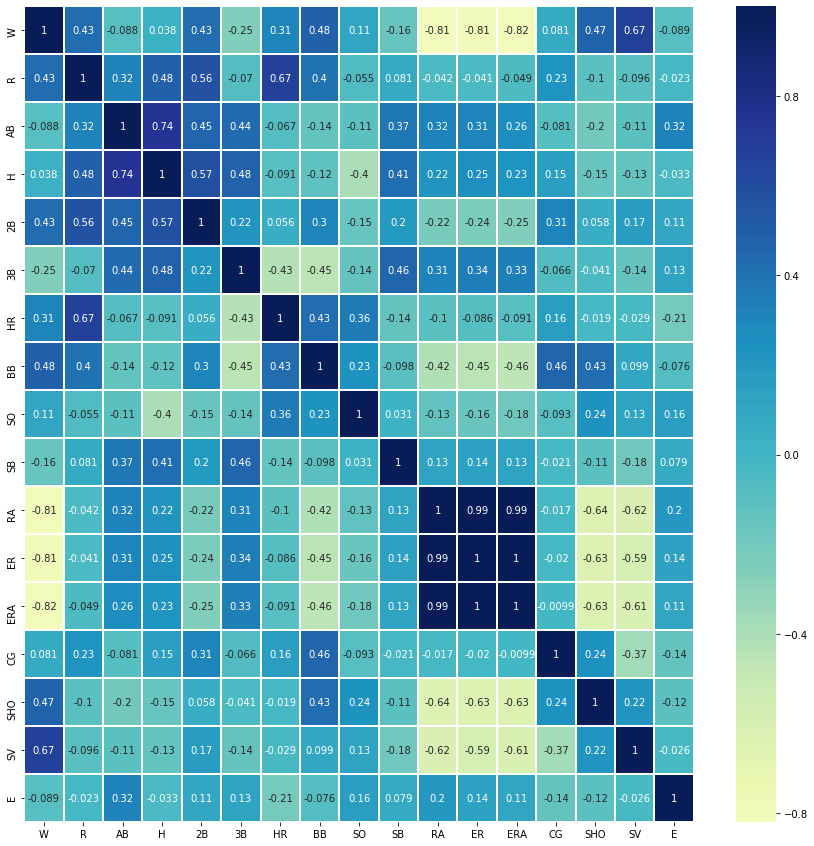

In [16]:
# Plotting Heatmap for correlation
fig, ax =plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidths=1,center=0,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [17]:
# checking the skewness
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [18]:
# Removing Skewness
for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [19]:
# checking the skewness
df.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

In [20]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(30, 17)
(29, 17)


In [21]:
# Checking the correlation
df_new.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)
# children are having very weak correlation with the target value.

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1,0.4,-0.086,-0.021,0.38,-0.21,0.25,0.45,0.16,-0.17,-0.82,-0.82,-0.83,0.00012,0.45,0.76,-0.075
R,0.4,1,0.44,0.43,0.48,0.14,0.59,0.26,0.095,0.073,-0.029,-0.0077,-0.025,0.16,-0.13,0.082,0.04
AB,-0.086,0.44,1,0.77,0.49,0.45,-0.065,-0.14,-0.11,0.37,0.32,0.31,0.25,-0.056,-0.19,-0.14,0.32
H,-0.021,0.43,0.77,1,0.53,0.58,-0.22,-0.22,-0.37,0.42,0.24,0.28,0.26,0.063,-0.12,-0.1,-0.013
2B,0.38,0.48,0.49,0.53,1,0.34,-0.099,0.21,-0.097,0.19,-0.22,-0.22,-0.25,0.23,0.089,0.25,0.15
3B,-0.21,0.14,0.45,0.58,0.34,1,-0.37,-0.4,-0.2,0.48,0.31,0.33,0.33,-0.0029,-0.075,-0.26,0.099
HR,0.25,0.59,-0.065,-0.22,-0.099,-0.37,1,0.34,0.48,-0.17,-0.093,-0.062,-0.071,0.13,-0.063,0.1,-0.18
BB,0.45,0.26,-0.14,-0.22,0.21,-0.4,0.34,1,0.32,-0.12,-0.43,-0.46,-0.47,0.45,0.4,0.21,-0.052
SO,0.16,0.095,-0.11,-0.37,-0.097,-0.2,0.48,0.32,1,0.038,-0.14,-0.18,-0.2,-0.068,0.17,0.12,0.15
SB,-0.17,0.073,0.37,0.42,0.19,0.48,-0.17,-0.12,0.038,1,0.13,0.15,0.13,-0.042,-0.091,-0.19,0.078


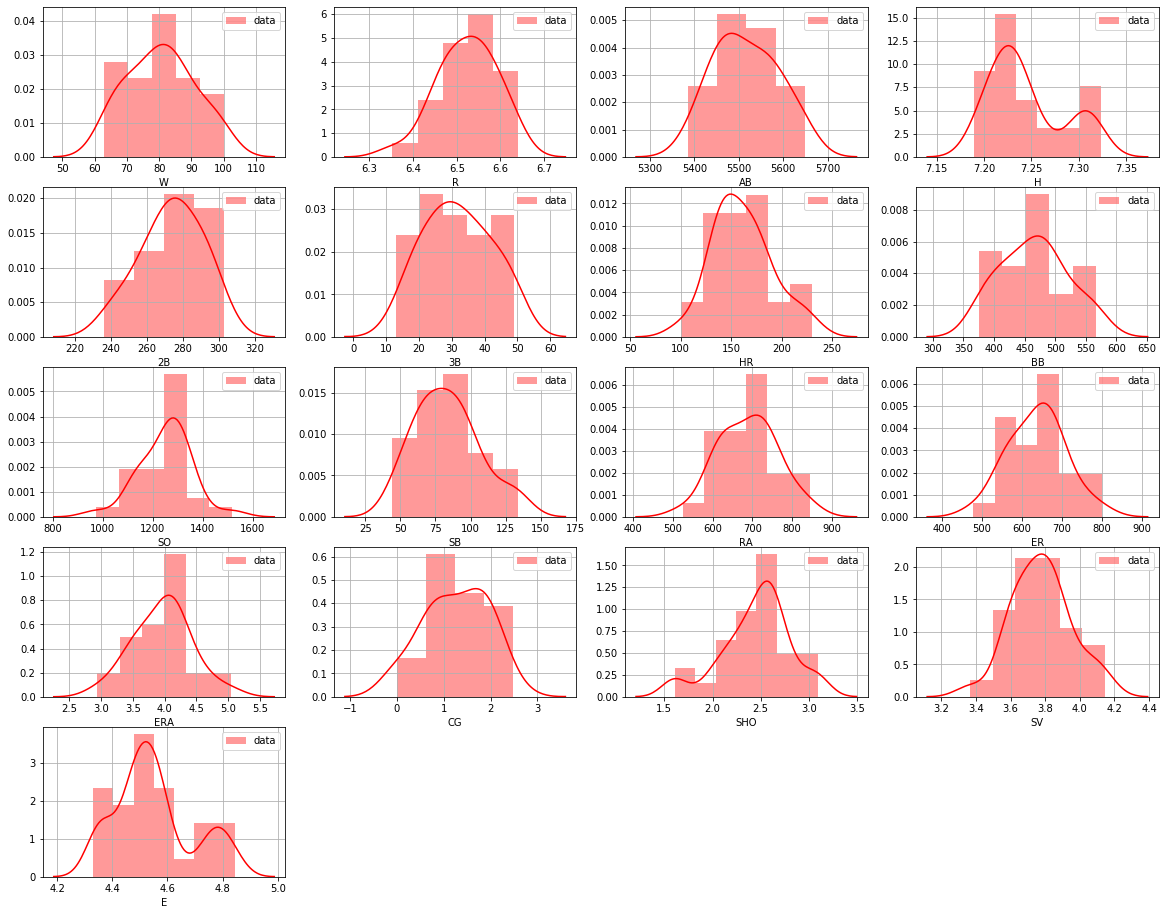

In [23]:
# Checking the Normal Distribution using distplot after removing skewness
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_new.columns.values)):
    plt.subplot(5,4,i+1)
    sns.distplot(df_new[col],color='red',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.

In [24]:
# Drooping the target value to fit the remaining data into standard scaler 
x1=df_new.drop(['W','CG'],axis=1)
x1
print(x1.shape)

(29, 15)


In [25]:
# Setting up the Target value in variable y.
y=df_new['W']
y.shape

(29,)

In [26]:
#scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,0.952719,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.722413,1.554812,-0.435733
1,0.356659,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.312085,0.296229,-0.598110
2,-0.241239,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,-0.157879,-0.672787,-1.197382
3,-1.341932,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,-0.426009,-0.825263,0.538291
4,0.203902,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.312085,-1.142637,-0.598110
5,1.765462,0.716535,-0.051906,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-2.375997,0.667088,-0.045239
6,0.721344,-0.447345,-0.553131,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-0.157879,0.035297,-1.378259
7,-0.816734,-0.447345,-0.310580,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,0.312085,1.952930,0.105172
8,1.445583,1.752672,1.689389,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.157879,-0.379227,0.252482
9,1.506078,-0.078310,0.349394,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,-0.426009,0.296229,1.699369


# MODEL TRAINING

In [27]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters):
    clf = GridSearchCV(mod,parameters,scoring='r2' ,cv=10)
    clf.fit(x,y)
    print(clf.best_params_)
    

In [28]:
#     Grid Search for SVR
SV=SVR()
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
parameters={'C': Cs, 'gamma' : gammas}
grid_cv(SV,parameters)

{'C': 10, 'gamma': 0.01}


In [29]:
#     Grid Search for KNeighborsRegressor
knr=KNeighborsRegressor()
parameters={"n_neighbors":np.arange(1,24)}
grid_cv(knr,parameters)

{'n_neighbors': 5}


In [30]:
#     Grid Search for Lasso
ls=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
grid_cv(ls,parameters)

{'alpha': 1}


In [31]:
#..............Grid Search for GradientBoostingRegressor...............
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid_cv(gbr,parameters)

{'learning_rate': 0.001, 'n_estimators': 100}


In [32]:
#.................Grid Search for RandomForestRegressor..........
rf=RandomForestRegressor()
parameters={'n_estimators': [200,500, 700,],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters)

{'max_features': 'log2', 'n_estimators': 700}


In [33]:
#.......Gridsearchcv for Ada Boost Regressor...........
ada=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
grid_cv(ada,parameters,)

{'learning_rate': 1, 'n_estimators': 500}


In [34]:
#..............Defining Instances For Differnt Models and fitting best parameters found out from grid search........
KNR=KNeighborsRegressor(n_neighbors=5)
SV=SVR(C=10,gamma=0.01)
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor(max_features='sqrt',n_estimators=500)
GBR=GradientBoostingRegressor(learning_rate=0.01,n_estimators=10)
ABR=AdaBoostRegressor(learning_rate=0.001,n_estimators=100)
LS=Lasso(alpha=1)
RD=Ridge()
EN=ElasticNet()

In [35]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))

In [36]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_r2_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state


In [37]:
Model=[]
Score=[]
R2_score=[]
cvs=[]
MSE=[]
RMSE=[]
# Create a function to fit and score models
# Make a dictionary to keep model scores
model_r_scores = {}
# Loop through models
# ...............For Loop to Calculate R_2 Score, Cross Val Score and errors.........
for name, model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_r2_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    model.fit(x_train,y_train)
    score=model.score(x_train, y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
#.........Calculating cross_val_score...........
    cv_score=cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
#.......Calculating Mean_square_error..........    
    mse=mean_squared_error(y_test,y_pred)
    print('Mean Squared Error : ',mse )
    MSE.append(mse*100)
    print('\n')
#.......Calculating.....Root_Mean_square_error.........   
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error : ',rmse )
    RMSE.append(rmse*100)
    print('\n')
    
    
        


*************************** KNeighborsRegressor *****************************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


max r2 score corresponding to 84 is: 0.7852631578947369
Learning Score :  0.7554590026449907
R2 Score :  0.6506904231625834


Cross Val Score :  -3.1061604151118303


Mean Squared Error :  17.42666666666667


Root Mean Squared Error :  4.174525921187539


*************************** SVR *****************************


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


max r2 score corresponding to 82 is: 0.8168440029664708
Learning Score :  0.7541678241746235
R2 Score :  0.7975183875047234


Cross Val Score :  -4.048106254461834


Mean Squared Error :  14.809280158335087


Root Mean Squared Error :  3.8482827544679052


**********

In [38]:
#............. DataFrame to show all the calculated scores at one place........
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'R2_score':R2_score,'Cross_Val_Score':cvs,
                     'Mean_squared_error':MSE,'Root_Mean_squared_error':RMSE})  
result

,Model,Learning Score,R2_score,Cross_Val_Score,Mean_squared_error,Root_Mean_squared_error
0,KNeighborsRegressor,75.545900,65.069042,-310.616042,1742.666667,417.452592
1,SVR,75.416782,79.751839,-404.810625,1480.928016,384.828275
2,LinearRegression,93.858368,78.884946,-349.433900,1341.978971,366.330312
3,DecisionTreeRegressor,100.000000,12.177419,-1852.942589,6050.000000,777.817459
4,RandomForestRegressor,94.119411,85.159625,-559.183973,902.377267,300.395950
5,GradientBoostingRegressor,17.153200,10.111655,-625.076258,10329.669030,1016.349794
6,AdaBoostRegressor,98.792804,71.648751,-730.201945,1697.924797,412.058830
7,Lasso,87.404491,95.584486,-280.638065,322.945812,179.706931
8,Ridge,90.814997,94.678064,-416.468166,719.200567,268.179150
9,ElasticNet,84.775301,92.341123,-263.800096,560.161722,236.677359


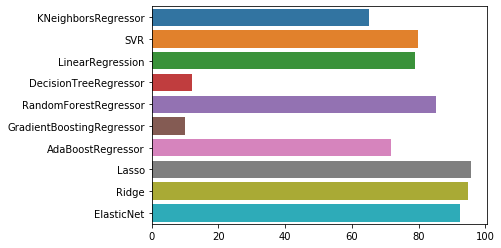

In [39]:
# ..........visualisation of Accuracy Score using Bar Plot..........
sns.barplot(y=Model,x=R2_score)

# After all this process conclusion is that Lasso is performing better than rest as along r2_score it's error is better among all...

In [40]:
# Using Lasso for final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=82,test_size=.20,)
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
lspred=ls.predict(x_test)
print('R2 Score : ',r2_score(y_test,lspred))
print('Mean Squarred Error : ',mean_squared_error(y_test,lspred))
print('Root Mean Squarred Error : ',np.sqrt(mean_squared_error(y_test,lspred)))

R2 Score :  0.9558448566938367
Mean Squarred Error :  3.229458120142447
Root Mean Squarred Error :  1.7970693142287102


In [41]:
# Printing predicted values
test=pd.DataFrame(data=y_test)
test['Predicted values']=lspred
test

,W,Predicted values
24,63,64.829039
9,78,79.711566
13,76,78.032442
20,90,90.408508
22,71,72.131164
21,83,85.743114


In [42]:
# Saving the Predicted values in csv file
test.to_csv('Project_7_Baseball.csv',index=False) 

In [43]:
# Dumping Data in pickle file.
from sklearn.externals import joblib
joblib.dump(ls,'Project_7_Baseball.pkl')

['Project_7_Baseball.pkl']

In [44]:
# Loadinf predicted values.
final=joblib.load('Project_7_Baseball.pkl')
final.predict(x_test)

array([64.82903913, 79.71156561, 78.03244176, 90.40850809, 72.13116439,
       85.74311438])

## Conclusion:                   
            
1) At Bats(AB),Homeruns(H),Errors(E) all are having very weak correlation with Target.             
2) (Runs Allowed)RA,Earned Run(ER),Earned Run Average(ERA), have strong but negative correlation with the target.           
3) Runs(R),Doubles(2B),Walks(BB),Shutouts(SHO),Saves(SV) have strong and positive correlation with the target. 
4) (CG) has almost no correlation with Wins(W).          


## Steps Followed:        
           
1) Understanding Data.   
2) EDA Analysis.       
3) Best parameters are found using Gridsearch cv and applied to models.        
4) Best parameters are applied to each models and machine is trained for each models to find Best R2 Score, Cross val score,        mean squared error and root mean square error.             
5) A Result table is made comprises of r2, cross_val score, mean squared error and root mean square error of each model.    
6) Lasso is used to train the model finally as it's r2_score is best and error is less among the rest of the models.     
7) Predicted values are saved in Project_7_Baseball.csv file.      
8) Pickle file is named with Project_7_Baseball.pkl     
